# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:black">Neste projeto, iremos desenvolver um modelo de previsão de renda, usando dados como posse de veículo, imóvel, quantidade de filhos, tipo de renda, educação e entre outras. Todos os passos tomados estará explicitado nesse notebook e construiremos a visualização no streamlit.</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:black">Abaixo segue uma tabela dos dados com nome, descrição e tipo.</span>


### Dicionário de dados

<span style="color:black">Vamos analisar brevemente os tipos para depois adequar para construirmos o modelo.</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de Referência                                      | datetime|
| id_cliente              |  ID Único                                      | int64|
| sexo                    |  Masculino ou Feminino                                      |Booleano|
| posse_de_veiculo        |  Se possuí ou não veículo                                      | Booleano|
| posse_de_imovel         |  Se possuí ou não imóvel                                      | Booleano|
| qtd_filhos              |  Quantidade de Filhos                                      | int64|
| tipo_renda              |  Tipo de renda                                      | object|
| educacao                |  Educação atual                                      | object|
| estado_civil            |  Estado Civil                                      | object|
| tipo_residencia         |  Tipo da Residência                                      | object|
| idade                   |  Idade                                      | int64|
| tempo_emprego           |  Tempo de emprego                                      | int64|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                    | int64|
| renda                   |  Valor da renda                                      | float64|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ydata_profiling

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

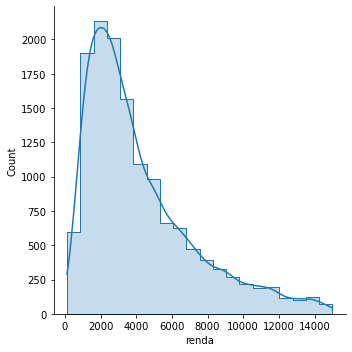

In [3]:
sns.displot(data = renda[renda['renda']<15000]
            ,alpha = .25
            ,x = 'renda'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

<AxesSubplot:ylabel='tempo_emprego'>

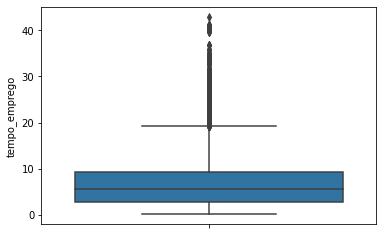

In [4]:
sns.boxplot(y="tempo_emprego", data=renda[renda['renda']<15000])

O primeiro gráfico nos motra que a maioria das pessoas estão na faixa de 0-6000 de renda, e o tempo de emprego mostra um padrão entre 2-10 anos. 

### Entendimento dos dados - Bivariadas




<span style="color:black">Agora vamos analisar a renda por educação, sexo e o tipo da renda</span>


<AxesSubplot:xlabel='educacao', ylabel='renda'>

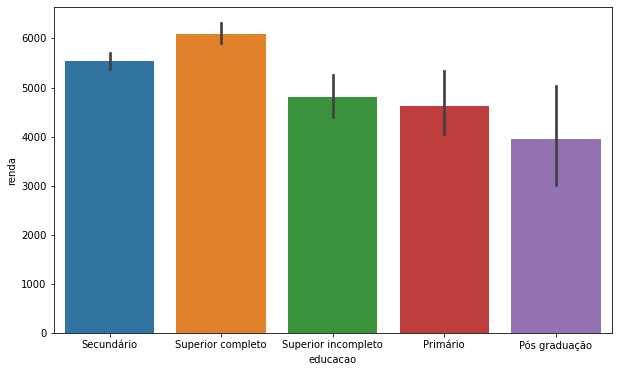

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='educacao', y='renda', data=renda)

<AxesSubplot:xlabel='sexo', ylabel='renda'>

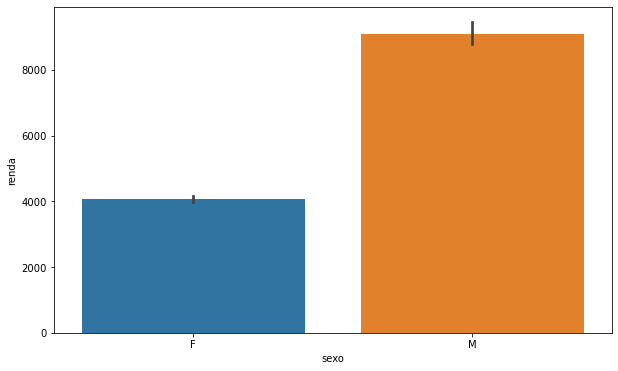

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='sexo', y='renda', data=renda)

<AxesSubplot:xlabel='tipo_renda', ylabel='renda'>

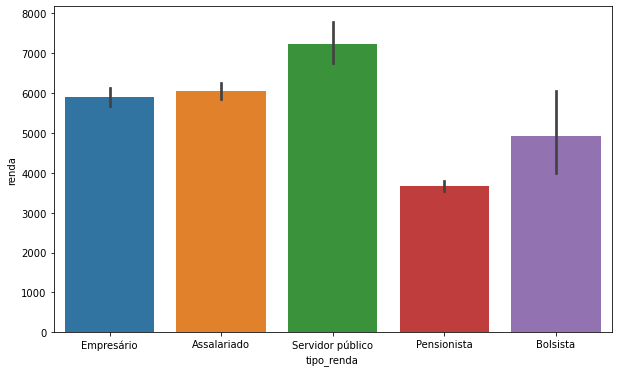

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='tipo_renda', y='renda', data=renda)

- O primeiro gráfico nos mostra que não há tanta disparidade assim entre os dados de educação, sendo o de pós-graduação o com menos renda.
- O segundo gráfico aponta que a média da renda masculina é relativamente maior que a Feminina.
- o terceiro gráfico nos diz que servidor público, assalariado e empresário possuem as maiores rendas, respectivamente.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


Vamos olhar o tipo de dados da nossa base.

In [8]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

Precisamos transformar as variáveis qualitativas em dummies, e organizar as quantitativas.
Vamos começar elimando os dados duplicados e os dados faltantes.

In [9]:
renda.drop_duplicates(inplace=True)
renda.dropna(inplace=True)

Agora, vamos eliminar as colunas que não serão necessárias.

In [10]:
renda = renda[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 
        'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]

Agora, iremos alterar renda para booleano

In [11]:
renda.sexo = renda.sexo.map({'F': 1, 'M':0})
renda['sexo'] = renda['sexo'].astype(bool)
renda.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,True,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,False,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,True,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,True,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,False,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [12]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12427 non-null  bool   
 1   posse_de_veiculo       12427 non-null  bool   
 2   posse_de_imovel        12427 non-null  bool   
 3   qtd_filhos             12427 non-null  int64  
 4   tipo_renda             12427 non-null  object 
 5   educacao               12427 non-null  object 
 6   estado_civil           12427 non-null  object 
 7   tipo_residencia        12427 non-null  object 
 8   idade                  12427 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  12427 non-null  float64
 11  renda                  12427 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 1007.3+ KB


Agora temos nossa base tratada e pronta para a Etapa 4: Modelagem

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:black">Vamos utilizar um modelo de regressão múltipla explicar a renda de cada indivíduo e qual das variáveis que padronizamos anteriormente é mais influente.</span>


### Rodando o modelo


<span style="color:black">Vamos importar as bibliotecas que utilizaremos.</span>


In [18]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
import numpy as np

In [15]:
y, x = patsy.dmatrices('renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + C(tipo_renda) + C(educacao) + C(tipo_residencia) + tempo_emprego', data = renda)
x

DesignMatrix with shape (12427, 18)
  Columns:
    ['Intercept',
     'C(sexo)[T.True]',
     'C(posse_de_veiculo)[T.True]',
     'C(posse_de_imovel)[T.True]',
     'C(tipo_renda)[T.Bolsista]',
     'C(tipo_renda)[T.Empresário]',
     'C(tipo_renda)[T.Pensionista]',
     'C(tipo_renda)[T.Servidor público]',
     'C(educacao)[T.Pós graduação]',
     'C(educacao)[T.Secundário]',
     'C(educacao)[T.Superior completo]',
     'C(educacao)[T.Superior incompleto]',
     'C(tipo_residencia)[T.Casa]',
     'C(tipo_residencia)[T.Com os pais]',
     'C(tipo_residencia)[T.Comunitário]',
     'C(tipo_residencia)[T.Estúdio]',
     'C(tipo_residencia)[T.Governamental]',
     'tempo_emprego']
  Terms:
    'Intercept' (column 0)
    'C(sexo)' (column 1)
    'C(posse_de_veiculo)' (column 2)
    'C(posse_de_imovel)' (column 3)
    'C(tipo_renda)' (columns 4:8)
    'C(educacao)' (columns 8:12)
    'C(tipo_residencia)' (columns 12:17)
    'tempo_emprego' (column 17)
  (to view full data, use np.asarray(th

In [16]:
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     248.6
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        20:27:43   Log-Likelihood:            -1.2881e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12409   BIC:                         2.578e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            4183.8621    954.118      4.385      0.000    2313.643    6054.081
C(sexo)[T.True]                     -6017.6181    154.447    -38.962      0.000   -6320.358   -5714.878
C(posse_de_veiculo)[T.True]            62.3748    149.006      0.419      0.676    -229.700     354.449
C(posse_de_imovel)[T.True]            426.8623    148.197      2.880      0.004     136.374     717.351
C(tipo_renda)[T.Bolsista]            -959.6053   2566.110     -0.374      0.708   -5989.579    4070.368
C(tipo_renda)[T.Empresário]           768.9837    158.488      4.852      0.000     458.323    1079.644
C(tipo_renda)[T.Pensionista]        -3148.1162   2564.328     -1.228      0.220   -8174.597    1878.365
C(tipo_renda)[T.Servidor público]     123.2882    236.425      0.521      0.602    -340.141     586.717
C(educacao)[T.Pós graduação]         1215.9270   1690.272      0.719      0.472   -2097.268    4529.122
C(educacao)[T.Secundário]             733.4671    765.356      0.958      0.338    -766.750    2233.685
C(educacao)[T.Superior completo]     1266.4903    768.386      1.648      0.099    -239.666    2772.647
C(educacao)[T.Superior incompleto]     64.9701    826.369      0.079      0.937   -1554.842    1684.782
C(tipo_residencia)[T.Casa]            -79.8724    574.730     -0.139      0.889   -1206.433    1046.688
C(tipo_residencia)[T.Com os pais]    -405.3223    641.706     -0.632      0.528   -1663.165     852.520
C(tipo_residencia)[T.Comunitário]    -141.0064   1120.304     -0.126      0.900   -2336.976    2054.964
C(tipo_residencia)[T.Estúdio]         360.0755   1055.916      0.341      0.733   -1709.684    2429.835
C(tipo_residencia)[T.Governamental]   376.1808    700.516      0.537      0.591    -996.939    1749.300
tempo_emprego                         570.7606     10.553     54.086      0.000     550.075     591.446
==============================================================================
Omnibus:                    17571.964   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9880668.493
Skew:                           8.128   Prob(JB):                         0.00
Kurtosis:                     140.179   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
y, x = patsy.dmatrices('np.log(renda) ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + C(tipo_renda)  + tempo_emprego', data = renda)
sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     837.5
Date:                Wed, 03 May 2023   Prob (F-statistic):               0.00
Time:                        20:30:18   Log-Likelihood:                -13635.
No. Observations:               12427   AIC:                         2.729e+04
Df Residuals:                   12418   BIC:                         2.736e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             8.1307      0.018    444.916      0.000       8.095       8.167
C(sexo)[T.True]                      -0.7726      0.015    -53.266      0.000      -0.801      -0.744
C(posse_de_veiculo)[T.True]           0.0509      0.014      3.632      0.000       0.023       0.078
C(posse_de_imovel)[T.True]            0.0943      0.014      6.890      0.000       0.067       0.121
C(tipo_renda)[T.Bolsista]             0.3204      0.242      1.324      0.186      -0.154       0.795
C(tipo_renda)[T.Empresário]           0.1578      0.015     10.612      0.000       0.129       0.187
C(tipo_renda)[T.Pensionista]         -0.2945      0.242     -1.218      0.223      -0.769       0.180
C(tipo_renda)[T.Servidor público]     0.0749      0.022      3.376      0.001       0.031       0.118
tempo_emprego                         0.0637      0.001     64.233      0.000       0.062       0.066
==============================================================================
Omnibus:                        0.878   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.846
Skew:                           0.015   Prob(JB):                        0.655
Kurtosis:                       3.026   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Etapa 5 Crisp-DM: Avaliação dos resultados


Utilizando os recursos do Patsy para avaliar os parâmetros e ver o que faz sentido. 
Note que passamos as variáveis qualitativas como dummies.

Após rodar o primeiro modelo, eliminamos as váriavéis tipo_residencia e educacao e colocaremos o valor da renda em log.
Resultou em um modelo com um r² melhor.

## Etapa 6 Crisp-DM: Implantação

Vamos construir uma árvore de decisão, que irá predizer se a pessoa terá uma renda > 15000 ou > 10000 ou < 5000

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Vamos criar uma nova coluna na DataFrame renda para indicar se a renda é maior que 5000, 10000 ou 15000.

In [39]:
renda['renda_alta'] = np.where(renda['renda'] > 15000, 2, np.where(renda['renda'] > 10000, 1, np.where(renda['renda'] > 5000, 0, -1)))

Agora as matrizes x e y a partir da nova coluna criada e das variáveis explicativas

In [40]:
y, x = patsy.dmatrices('renda_alta ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + C(tipo_renda) + tempo_emprego', data=renda)

Vamos dividir o conjunto de dados em conjuntos de treinamento e teste

In [41]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

Vamos agora criar o modelo de árvore de decisão

In [42]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth=3)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3)

Vamos avaliar o desempenho do modelo

In [71]:
acuracia = arvore.score(x_teste, y_teste)
print(f"A Acurácia do nosso modelo de árvore é de: {acuracia*100:.2f}%")

A Acurácia do nosso modelo de árvore é de: 65.27%


Agora, para finalizar vamos plotar a árvore.

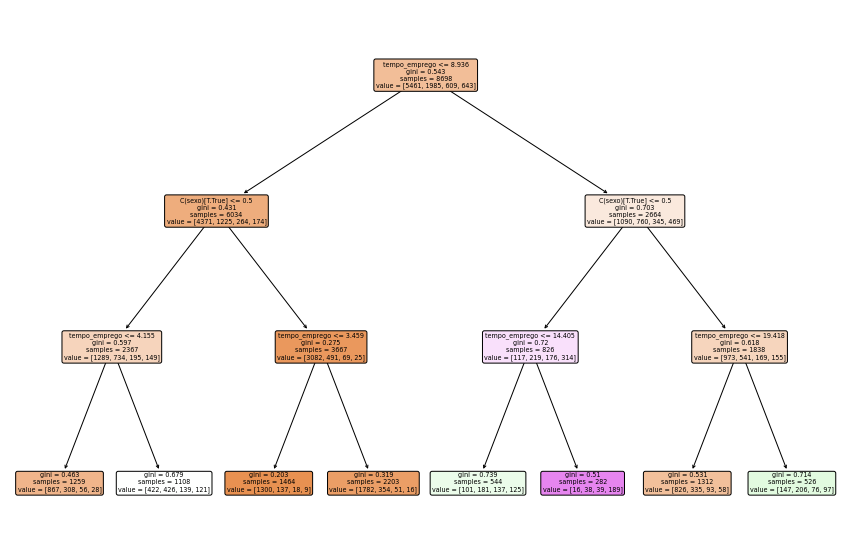

In [69]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(arvore, feature_names=x.design_info.column_names, filled=True, rounded=True)
plt.show()